# **Capstone Module 3**
Karina Fidelia Ramadhani - JCDSOH01-003

## **I. LATAR BELAKANG**


Aplikasi bike-sharing merupakan inovasi baru dari sistem penyewaan sepeda tradisional. Pada aplikasi ini, seluruh proses mulai dari pendaftaran member, peminjaman, hingga pengembalian sepeda dilakukan secara otomatis. Kemudahan ini memungkinkan pengguna untuk menyewa sepeda di suatu lokasi dan mengembalikannya di lokasi lain dengan lebih fleksibel. Saat ini, tercatat lebih dari 500 program bike-sharing di berbagai negara dengan jumlah sepeda mencapai lebih dari 500 ribu unit. Tingginya minat terhadap sistem ini tidak lepas dari perannya yang penting dalam masalah lalu lintas, lingkungan, serta kesehatan masyarakat.  

Selain praktis, sistem bike-sharing juga menghasilkan data dengan karakteristik yang menarik untuk diteliti. Berbeda dengan moda transportasi lain seperti bus atau kereta bawah tanah, data dari bike-sharing secara eksplisit mencatat durasi perjalanan, lokasi awal keberangkatan, hingga lokasi akhir pengembalian sepeda. Hal ini menjadikan bike-sharing sebagai semacam jaringan sensor virtual yang mampu memetakan pergerakan mobilitas masyarakat dalam kota. Dengan memanfaatkan data tersebut, peneliti maupun pemerintah dapat mendeteksi berbagai peristiwa penting di perkotaan, mengidentifikasi pola mobilitas, hingga menyusun kebijakan transportasi yang lebih efektif.  

Berdasarkan latar belakang tersebut, penelitian mengenai data sistem bike-sharing menjadi relevan dan penting dilakukan. Analisis terhadap data ini tidak hanya berkontribusi dalam bidang teknologi dan transportasi, tetapi juga memiliki implikasi luas pada aspek sosial, lingkungan, dan kesehatan masyarakat di masa depan.

## **II. RUMUSAN MASALAH**


Kita diminta untuk memodelkan permintaan bike-sharing menggunakan variabel-variabel yang tersedia, untuk menyesuaikan strategi bisnis dan memahami dinamika pemintaan pasar.  

Beberapa pertanyaan yang mendasari analisa data ini, yaitu:  

1. Faktor-faktor apa saja yang memengaruhi jumlah penyewaan sepeda?   

2. Apakah kondisi cuaca (hujan, suhu rendah/tinggi, kelembapan) berpengaruh signifikan terhadap penggunaan sepeda?    

3. Apakah data peminjaman sepeda dapat diprediksi dengan baik menggunakan model machine learning?  


## **III. DATA**

In [1]:
# Import Library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# Data Splitting
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import RobustScaler

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# Cross Validation
from sklearn.model_selection import cross_validate 

# Modeling
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Metrics Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("data_bike_sharing.csv")
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


### **Understanding Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.shape

(12165, 11)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
# Ubah dteday menjadi datetime
df["dteday"] = pd.to_datetime(df["dteday"])

# Extrak time-based features
df["year"]= df["dteday"].dt.year
df["month"]= df["dteday"].dt.month
df["day_of_week"]= df["dteday"].dt.dayofweek + 1   # 1=Senin, 7=Minggu
df["is_weekend"]= df["day_of_week"].isin([6, 7]).astype(int) ## 1=Weekend, 0=Weekday

In [7]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,year,month,day_of_week,is_weekend
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,2011,12,5,0
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,2012,6,7,1
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,2011,6,3,0
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,2012,3,6,1
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,2012,7,2,0


### **EDA**

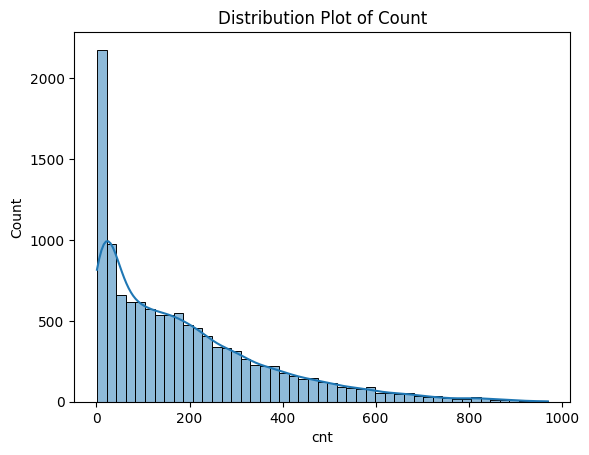

In [8]:
sns.histplot(df["cnt"], kde= True)
plt.title("Distribution Plot of Count")

plt.savefig("Distribution_Plot_of_Count.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

Berdasarkan plot distribusi jumlah penyewa di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur cnt.

<Axes: xlabel='year', ylabel='cnt'>

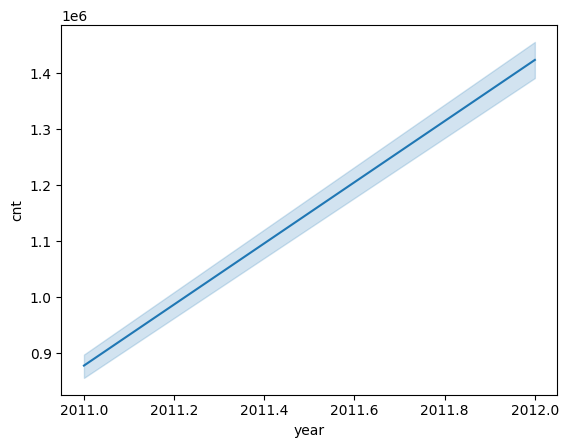

In [9]:
sns.lineplot(data=df,
             x= "year",
             y= "cnt",
             estimator= np.sum)

Jumlah penyewa mengalami peningkatan secara konsisten setiap tahunnya.

<Axes: >

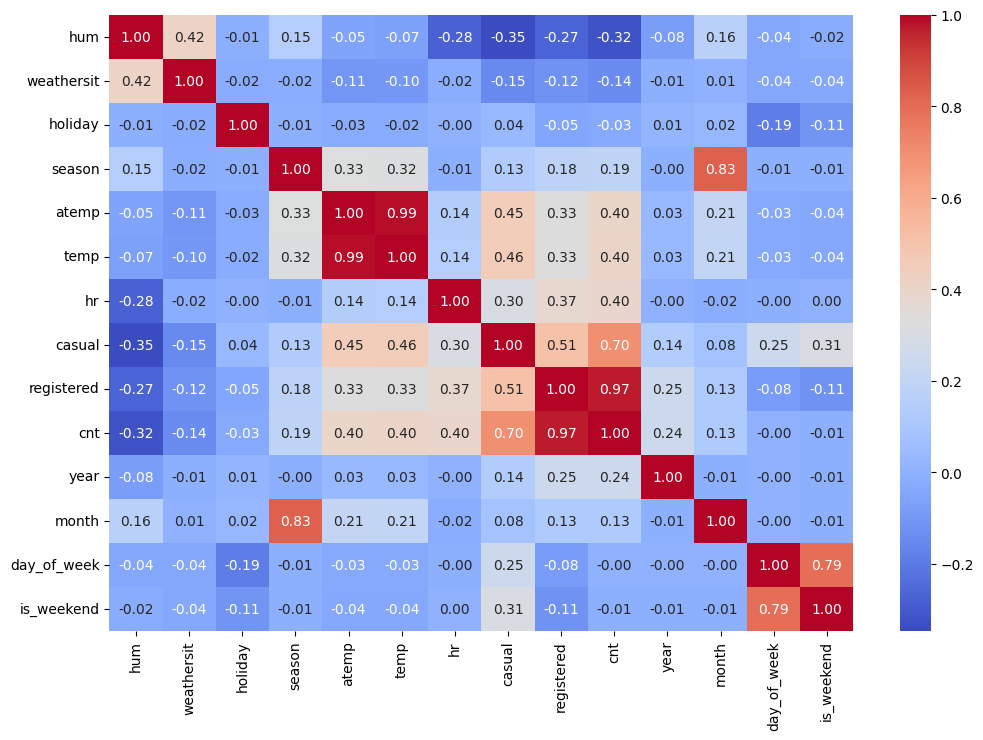

In [10]:
plt.figure(figsize= (12, 8))
sns.heatmap(df.corr(numeric_only= True),
            annot= True,
            cmap= "coolwarm",
            fmt= ".2f")

- Casual, registered, dan CNT memiliki korelasi yang tinggi, karena casual dan registered adalah bagian dari CNT.
- atemp, temp, hr memiliki korelasi yang positif.
- holiday, weathersit, hum memiliki korelasi yang negatif.

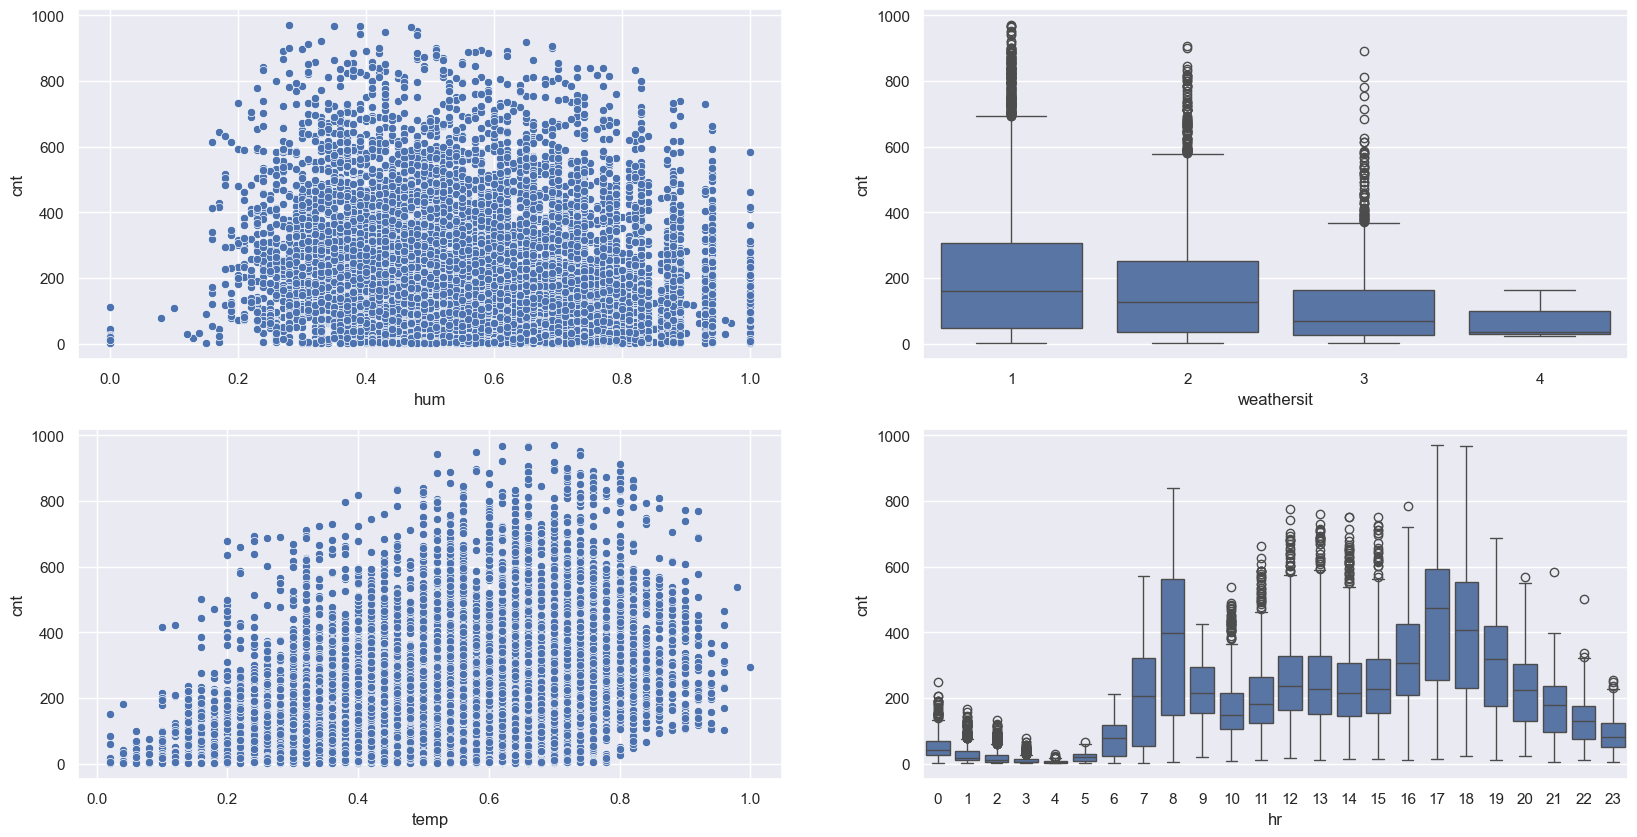

In [11]:
sns.set()
fig, axes= plt.subplots(2, 2, figsize= (20, 10))
c1= sns.scatterplot(data= df,
            x= "hum",
            y= "cnt",
            ax= axes[0, 0])

c2= sns.boxplot(data= df,
            x= "weathersit",
            y= "cnt",
            ax= axes[0, 1])

c3= sns.scatterplot(data= df,
                    x= "temp",
                    y= "cnt",
                    ax= axes[1, 0])

c4= sns.boxplot(data= df,
                x= "hr",
                y= "cnt",
                ax= axes[1, 1])
chart= [c1, c2, c3, c4]

plt.show()

### **Define X and Y**

In [12]:
# hapus kolom casual dan registered agar terhindar dari multicollinearity
X= df.drop(columns= ["casual", "registered", "cnt", "dteday"])
X

,hum,weathersit,holiday,season,atemp,temp,hr,year,month,day_of_week,is_weekend
0,0.62,1,0,4,0.3485,0.36,16,2011,12,5,0
1,0.64,1,0,2,0.5152,0.54,4,2012,6,7,1
2,0.53,1,0,2,0.6212,0.62,23,2011,6,3,0
3,0.87,2,0,2,0.3485,0.36,8,2012,3,6,1
4,0.55,1,0,3,0.6970,0.76,18,2012,7,2,0
...,...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.2273,0.24,7,2012,1,3,0
12161,0.62,1,0,3,0.7424,0.78,0,2012,7,5,0
12162,0.60,2,1,1,0.2121,0.24,5,2012,2,1,0
12163,0.77,2,0,2,0.4242,0.42,2,2012,3,6,1


In [13]:
y= df[["cnt"]]
y.head()

,cnt
0,250
1,18
2,107
3,145
4,857


### **Preprocessing**

StandarScaler: temp, atemp, hum, hr  
OneHot: weathersit, holiday, season, year, month, day_of_week, is_weekend

In [14]:
num_features = ["temp", "atemp", "hum", "hr"] 
cat_features = ["season", "weathersit", "holiday", "year", "month", "day_of_week", "is_weekend"]

In [15]:
transformer= ColumnTransformer([
    ("standar", StandardScaler(), num_features),
    ("onehot", OneHotEncoder(drop= "first"), cat_features)
], remainder= "passthrough")

### **Understanding Outlier**
- Mengecek apakah outlier berpengaruh terhadap model

In [16]:
Q1 = df["cnt"].quantile(0.25)
Q3 = df["cnt"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Model 1 — dengan outlier
model1 = XGBRegressor()
model1.fit(X, y)
pred1 = model1.predict(X)
rmse1 = mean_squared_error(y, pred1) ** 0.5  

# Hapus outlier
df_no_outlier = df[(df["cnt"] >= lower) & (df["cnt"] <= upper)]
X2 = df_no_outlier[["temp", "atemp", "hum", "weathersit", "season", "hr", "holiday", "year", "month", "day_of_week", "is_weekend"]]
y2 = df_no_outlier["cnt"]

# Model 2 — tanpa outlier
model2 = XGBRegressor()
model2.fit(X2, y2)
pred2 = model2.predict(X2)
rmse2 = mean_squared_error(y2, pred2) ** 0.5

print("RMSE dengan outlier :", rmse1)
print("RMSE tanpa outlier  :", rmse2)


RMSE dengan outlier : 28.250186885789468
RMSE tanpa outlier  : 26.24271080901264


Semakin kecil RMSE maka semakin baik akurasi modelnya. 
- Setelah outlier dihapus nilai RMSE menurun, artinya model tanpa outlier lebih baik.

In [17]:
X = df_no_outlier[["temp", "atemp", "hum", "weathersit", "season", "hr", "holiday", "year", "month", "day_of_week", "is_weekend"]]
y = df_no_outlier["cnt"]

### **Splitting Data**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                 y,
                 random_state=42,
                 test_size=0.2)

In [19]:
print("Jumlah data training :", X_train.shape[0])
print("Jumlah data testing  :", X_test.shape[0])

Jumlah data training : 9461
Jumlah data testing  : 2366


## **Cross Validation**

In [20]:
linear= LinearRegression()
random= RandomForestRegressor(random_state=42)
ridge= Ridge(random_state=0)
lasso= Lasso(random_state=0)
knn= KNeighborsRegressor()
tree= DecisionTreeRegressor(random_state=0)
gradient= GradientBoostingRegressor(random_state=0)
xgb= XGBRegressor(random_state=0)

In [21]:
from sklearn.model_selection import KFold

In [ ]:
# pilihan model algoritma
list_model = [linear, random, ridge, lasso, knn, tree, gradient, xgb]

# list scorer
list_scorer = ["neg_root_mean_squared_error", 
 "neg_mean_absolute_error",
 "neg_mean_absolute_percentage_error"]

# list kosong untuk menampung score
list_mean_rmse = []
list_std_rmse = []

list_mean_mae = []
list_std_mae = []
    
list_mean_mape = []
list_std_mape = []

list_kosong = []

for model in list_model:
    estimator=Pipeline([
        ("preprocess", transformer),
        ("model", model)
    ])

    kfold = KFold(n_splits=5, shuffle=True, random_state=42) 

    # cross val
    model_cv = cross_validate(
        estimator = estimator, 
        X = X_train, 
        y = y_train, 
        cv = kfold,
        scoring = list_scorer
        )

    # rmse
    list_kosong.append(model_cv)
    
    list_mean_rmse.append(model_cv["test_neg_root_mean_squared_error"].mean())
    list_std_rmse.append(model_cv["test_neg_root_mean_squared_error"].std())
    
    # mae
    list_mean_mae.append(model_cv["test_neg_mean_absolute_error"].mean())
    list_std_mae.append(model_cv["test_neg_mean_absolute_error"].std())
    
    # mape
    list_mean_mape.append(model_cv["test_neg_mean_absolute_percentage_error"].mean())
    list_std_mape.append(model_cv["test_neg_mean_absolute_percentage_error"].std())


In [23]:
# bikin dataframe untuk menampilkan score
df_score = pd.DataFrame()
df_score["Model"] = list_model
df_score["Mean_RMSE"] = list_mean_rmse
df_score["Std_RMSE"] = list_std_rmse
df_score["Mean_MAE"] = list_mean_mae
df_score["Std_MAE"] = list_std_mae
df_score["Mean_MAPE"] = list_mean_mape
df_score["Std_MAPE"] = list_std_mape

df_score

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,LinearRegression(),-119.894211,3.062494,-91.486777,2.448478,-3.057878,0.095542
1,RandomForestRegressor(random_state=42),-45.662380,1.769732,-28.339550,0.935355,-0.358696,0.010877
2,Ridge(random_state=0),-119.892360,3.066287,-91.487673,2.450599,-3.057636,0.095045
3,Lasso(random_state=0),-120.396934,3.117507,-91.914190,2.294792,-3.061919,0.095558
4,KNeighborsRegressor(),-104.718844,4.147757,-74.371010,2.661964,-2.451314,0.102622
5,DecisionTreeRegressor(random_state=0),-63.197832,1.869458,-37.827962,0.972467,-0.415959,0.013470
6,GradientBoostingRegressor(random_state=0),-67.922966,2.429777,-47.003934,1.477396,-0.920440,0.021278
7,"XGBRegressor(base_score=None, booster=None, ca...",-42.464452,1.509500,-27.042547,0.524767,-0.448652,0.026710


 - Model terbaik adalah XGBoost dengan score paling rendah dari model lainnya.

### **Hyperparameter Tuning (Randomize Search)**

Menggunakan randomizesearch karna setelah dicoba, hasilnya lebih optimal daripada gridsearch.

- RMSE

In [ ]:
from scipy.stats import randint, uniform

model= XGBRegressor(random_state=42)

# pipeline
xgb_pipeline = Pipeline([
    ("preprocess", transformer),
    ("model", XGBRegressor(random_state=42))
])

# parameter
parameter = {      
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.7, 0.8, 1.0]      
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42) 

random_search = RandomizedSearchCV(
    estimator = xgb_pipeline,
    param_distributions = parameter,
    n_iter = 30,                    
    scoring = "neg_root_mean_squared_error",
    cv = kfold,
    n_jobs = -1,
    random_state = 42,
    verbose = 2                      
)

In [25]:
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'model__learning_rate': [0.01, 0.05, ...], 'model__max_depth': [3, 5, ...], 'model__n_estimators': [100, 200, ...], 'model__subsample': [0.7, 0.8, ...]}"
,n_iter,30
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [26]:
print("Best parameter:", random_search.best_params_)
print("Best score (RMSE):", abs(random_search.best_score_))

Best parameter: {'model__subsample': 0.8, 'model__n_estimators': 200, 'model__max_depth': 7, 'model__learning_rate': 0.05}
Best score (RMSE): 40.276893615722656


- MAE

In [ ]:
from scipy.stats import randint, uniform

# pipeline
xgb_pipeline = Pipeline([
    ("preprocess", transformer),
    ("model", XGBRegressor(random_state=42))
])

# parameter
parameter = {      
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.7, 0.8, 1.0]       
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42) 

random_search = RandomizedSearchCV(
    estimator = xgb_pipeline,
    param_distributions = parameter,
    n_iter = 30,                     # hanya coba 30 kombinasi acak 
    scoring = "neg_mean_absolute_error",
    cv = kfold,
    n_jobs = -1,
    random_state = 42,
    verbose = 2                      
)

In [28]:
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'model__learning_rate': [0.01, 0.05, ...], 'model__max_depth': [3, 5, ...], 'model__n_estimators': [100, 200, ...], 'model__subsample': [0.7, 0.8, ...]}"
,n_iter,30
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [29]:
print("Best parameter:", random_search.best_params_)
print("Best score (MAE):", abs(random_search.best_score_))

Best parameter: {'model__subsample': 0.8, 'model__n_estimators': 200, 'model__max_depth': 7, 'model__learning_rate': 0.05}
Best score (MAE): 25.054441070556642


In [30]:
from tabulate import tabulate

data = [
    ["MAE", 27.04, 25.05],
    ["RMSE", 42.46, 40.28]
]

headers = ["Metrik", "Sebelum Tuning", "Setelah Tuning"]

print(tabulate(data, headers=headers, tablefmt="grid"))


+----------+------------------+------------------+
| Metrik   |   Sebelum Tuning |   Setelah Tuning |
+==========+==================+==================+
| MAE      |            27.04 |            25.05 |
+----------+------------------+------------------+
| RMSE     |            42.46 |            40.28 |
+----------+------------------+------------------+


- Model setelah tuning performanya meningkat dari sebelum tuning, ini menunjukkan model berhasil meningkatkan performa.

### **Final Model**

In [31]:
best_model = random_search.best_estimator_
best_model

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standar', ...), ('onehot', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [32]:
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


MAE : 24.915987014770508
RMSE: 39.20832624175237
R²  : 0.9374293088912964


R² = semakin mendekati 1 semakin baik  
MAE dan RMSE = semakin kecil semakin baik

In [33]:
residuals = y_test - y_pred

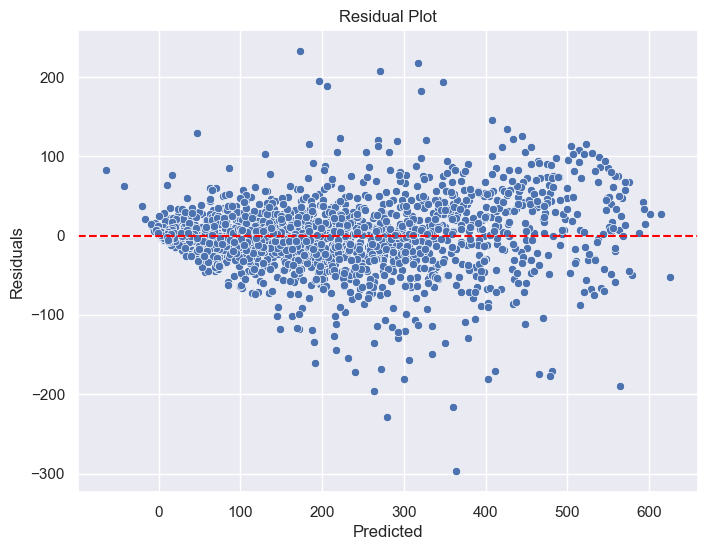

In [34]:
# Residual plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

- Sebagian besar titik berada di garis 0, berarti model tidak terlalu bias.
- Ada beberapa outlier ekstrim di angka 200 dan -200

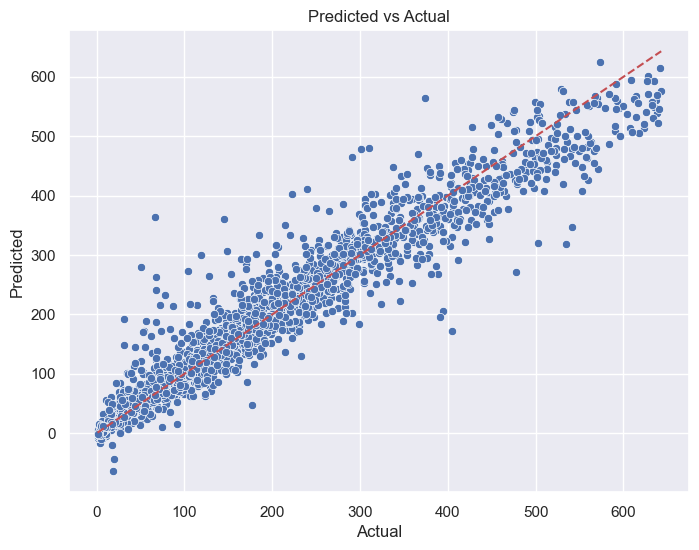

In [35]:
# Prediksi vs aktual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis diagonal
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.savefig("Predicted vs Actual.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

- Sebagian besar titik mengikuti garis diagonal, artinya secara umum memprediksi dengan baik.
- Titik terlihat lebih menyebar di 500 ke atas, artinya model kurang akurat ketika jumlah penyewaan tinggi.

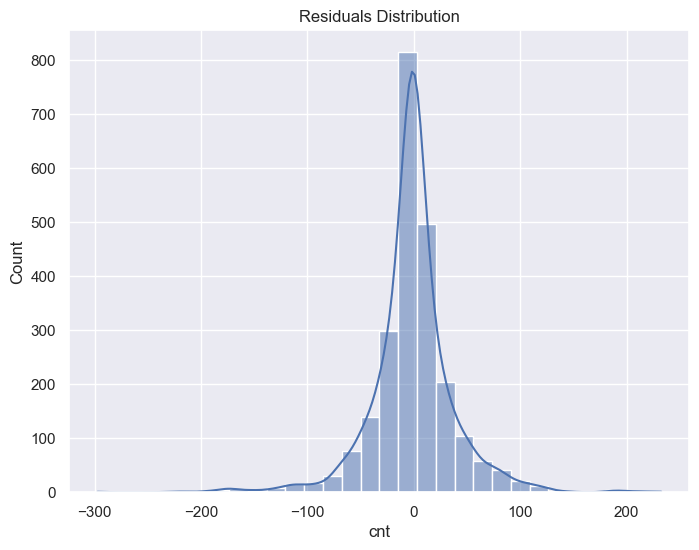

In [36]:
# Histogram residual
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.savefig("Residuals Distribution.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

- Residual tersebar di sekitar 0, artinya model cukup valid dan tidak bias.

### **Feature Importance**

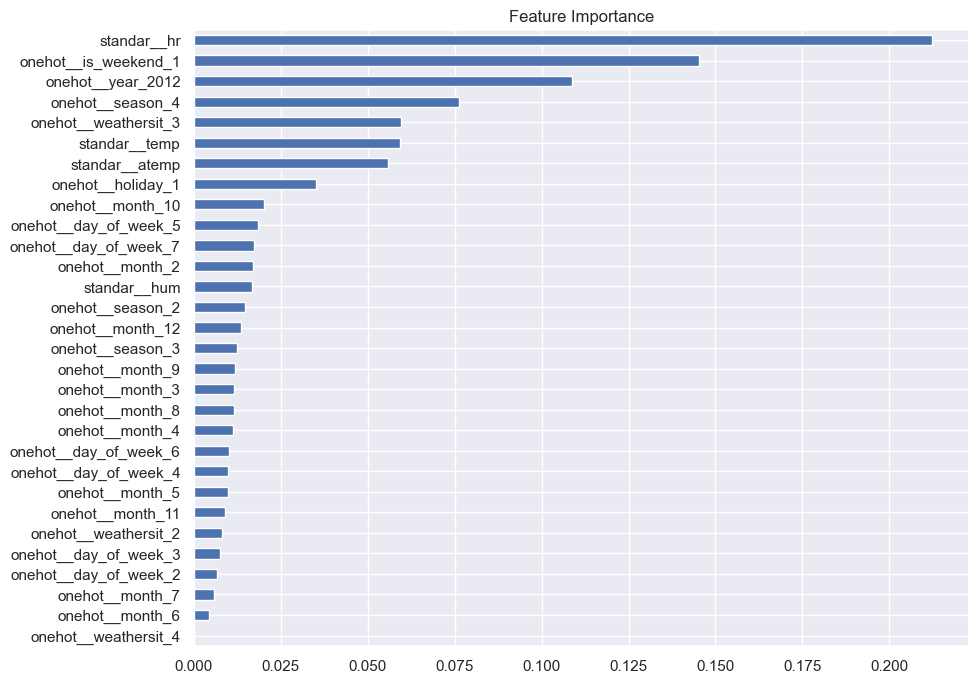

In [37]:
best_pipeline = random_search.best_estimator_

# Ambil model terakhir
best_model = best_pipeline.named_steps['model']

# Ambil nama fitur hasil transform
feature_names = best_pipeline.named_steps['preprocess'].get_feature_names_out()

# Buat Series dan plot
feature_importance = pd.Series(best_model.feature_importances_, index=feature_names)
feature_importance.sort_values().plot(kind='barh', figsize=(10,8))
plt.title("Feature Importance")
plt.savefig("Feature Importance.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

## **Save Final Model**

In [38]:
import pickle

In [39]:
# best model
xgb_tuning = random_search.best_estimator_
xgb_tuning

# fit
xgb_tuning.fit(X, y)

# save with pickle
pickle.dump(xgb_tuning, open("model_xgboost.sav", "wb"))

In [40]:
model_loaded = pickle.load(open("model_xgboost.sav", "rb"))
model_loaded

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standar', ...), ('onehot', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Coba prediksi

In [41]:
y[2]

np.int64(107)

In [42]:
X.iloc[[2], :]

,temp,atemp,hum,weathersit,season,hr,holiday,year,month,day_of_week,is_weekend
2,0.62,0.6212,0.53,1,2,23,0,2011,6,3,0


In [43]:
model_loaded.predict(X.iloc[[2], :])

array([103.96372], dtype=float32)

### Coba prediksi dengan kolom baru

In [44]:
new_data= pd.DataFrame({
    "temp": [0.62],
    "atemp": [0.6212],
    "hum": [0.53],
    "weathersit": [1],
    "season": [2],
    "hr": [23],
    "holiday": [0],
    "year": [2011],
    "month": [6],
    "day_of_week": [3],
    "is_weekend": [0]
})

new_data

,temp,atemp,hum,weathersit,season,hr,holiday,year,month,day_of_week,is_weekend
0,0.62,0.6212,0.53,1,2,23,0,2011,6,3,0


In [45]:
model_loaded.predict(new_data)

array([103.96372], dtype=float32)

### **Model Interpretation (SHAP)**

In [46]:
import shap 

In [47]:
shap.initjs()

In [48]:
best_pipeline = random_search.best_estimator_

# Ambil bagian model dan preprocessing-nya
xgb_model = best_pipeline.named_steps["model"]
preprocessor = best_pipeline.named_steps["preprocess"]

# Transform data train
X_train_transformed = preprocessor.transform(X_train)
feature_names = preprocessor.get_feature_names_out()

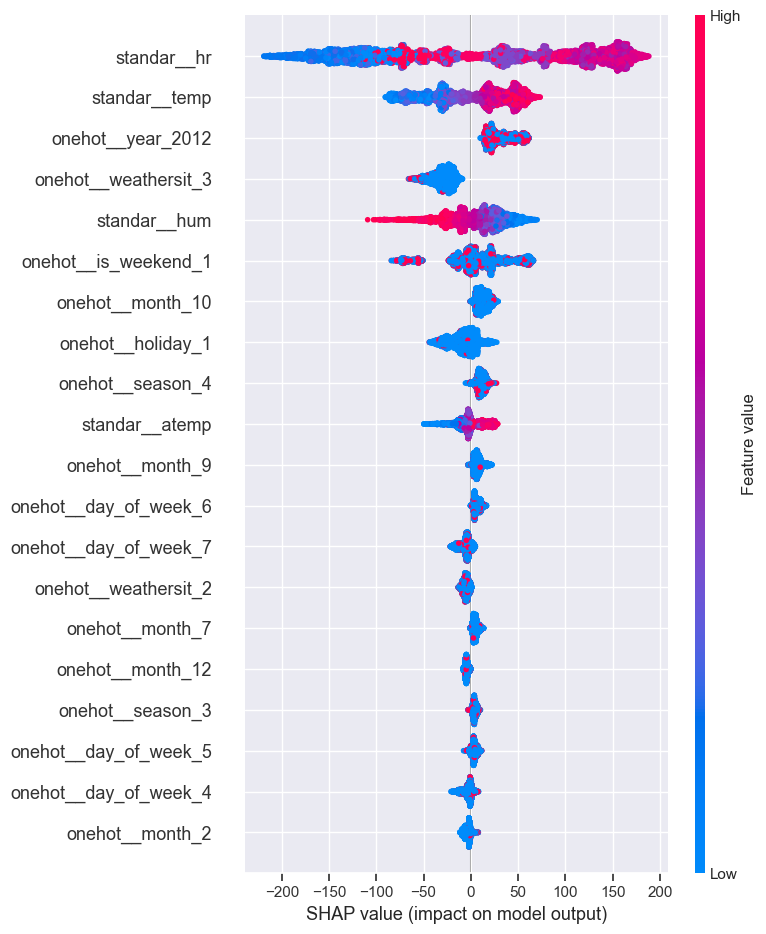

<Figure size 640x480 with 0 Axes>

In [ ]:
# Ubah ke dense array (karena SHAP tidak bisa pakai sparse matrix)
if hasattr(X_train_transformed, "toarray"):
    X_train_dense = X_train_transformed.toarray()
else:
    X_train_dense = X_train_transformed

# Buat explainer
explainer = shap.TreeExplainer(xgb_model)

# Hitung SHAP values
shap_values = explainer.shap_values(X_train_dense)

# Print
shap.summary_plot(shap_values, X_train_dense, feature_names=feature_names)


## **IV. KESIMPULAN DAN REKOMENDASI**

### **Kesimpulan**

1. Hour = Titik merah (sore) tersebar di sisi kanan (positif), titik biru (dini hari) di sisi kiri  
-> Saat waktu sore ke malam diprediksikan jumlah sewa meningkat, saat waktu malam ke dini hari diprediksikan jumlah sewa menurun  

2. Temp = Titik merah tersebar di sisi kanan, titik biru di sisi kiri  
-> Saat suhu lebih hangat diprediksikan jumlah sewa meningkat, saat suhu lebih dingin diprediksikan sewa menurun.

3. Weekend (1 = yes) = Titik merah (1) tersebar rata di kanan dan kiri, namun titik biru (0) lebih dominan.
-> Saat weekday memiliki pengaruh yang netral terhadap prediksi sewa. Tetapi saat weekday, diprediksikan jumlah sewa meningkat.




### **Rekomendasi**

- Berdasarkan waktu, optimalkan armada (sepeda) ketika jam-jam ramai penyewa, yaitu sekitar jam 12 siang (peak time) sampai dengan jam malam.  

- Ketika suhu rendah (dingin), bisa menambahkan harga diskon atau event bersepeda untuk merangsang penyewa ketika permintaan sedang rendah secara konstan.  

- Ketika hari kerja (weekday), permintaan sewa sepeda cukup tinggi dan stabil, maksimalkan armada untuk memenuhi permintaan.

- Saat akhir pekan (weekend), pengaruhnya netral terhadap tingkat sewa. Bisa menambahkan harga diskon atau event akhir pekan.